In [2]:
import pandas as pd
import numpy as np

#### Series

In [3]:
s = pd.Series([1,3,6,np.nan,44,1])

print(s)

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


Series的字符串表现形式为：索引在左边，值在右边。由于我们没有b为数据指定索引。于是会自动创建一个0到N-1（N为长度）的整数型索引。

#### DataFrame

In [5]:
dates = pd.date_range('20160101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])

print(df)

                   a         b         c         d
2016-01-01  1.423984 -1.300546  1.821605  0.186309
2016-01-02 -0.146226  1.443012 -1.047091  0.571134
2016-01-03  0.489771  0.084852 -0.161377 -1.597870
2016-01-04 -0.437539 -0.148120  1.027025 -0.519339
2016-01-05  1.656772  1.301950  0.682362  0.234778
2016-01-06 -0.964181 -1.671962  0.130660  0.296133


DataFrame是一个表格型的数据结构，它包含一组有序的列，每列可以是不同的值类型（数值，字符串，布尔值等），DataFrame既有行索引也有列索引， 它可以被看做由Series组成的大字典。

In [6]:
print(df['b'])

2016-01-01   -1.300546
2016-01-02    1.443012
2016-01-03    0.084852
2016-01-04   -0.148120
2016-01-05    1.301950
2016-01-06   -1.671962
Freq: D, Name: b, dtype: float64


In [7]:
# 创建一组没有给定行标签和列标签的数据 df1
# 默认的从0开始 index
df1 = pd.DataFrame(np.arange(12).reshape((3,4)))
print(df1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [8]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'})
                    
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [9]:
# 这种方法能对每一列的数据进行特殊对待. 如果想要查看数据中的类型, 我们可以用 dtype 这个属性:

print(df2.dtypes)

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


In [10]:
print(df2.index) # 查看行索引

Int64Index([0, 1, 2, 3], dtype='int64')


In [11]:
print(df2.columns) # 列索引

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


In [12]:
print(df2.values) # 只看值,每个元素都是object对象。

[[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']]


In [17]:
df2.describe() # 数据的总结

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [18]:
print(df2.T) #翻转数据

                     0                    1                    2  \
A                    1                    1                    1   
B  2013-01-02 00:00:00  2013-01-02 00:00:00  2013-01-02 00:00:00   
C                    1                    1                    1   
D                    3                    3                    3   
E                 test                train                 test   
F                  foo                  foo                  foo   

                     3  
A                    1  
B  2013-01-02 00:00:00  
C                    1  
D                    3  
E                train  
F                  foo  


In [19]:
print(df2.sort_index(axis=1, ascending=False)) # 对index进行排序

     F      E  D    C          B    A
0  foo   test  3  1.0 2013-01-02  1.0
1  foo  train  3  1.0 2013-01-02  1.0
2  foo   test  3  1.0 2013-01-02  1.0
3  foo  train  3  1.0 2013-01-02  1.0


In [21]:
print(df2.sort_values(by='E')) # 对 值 进行排序

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
2  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
3  1.0 2013-01-02  1.0  3  train  foo


### Pandas选择数据

In [24]:
# 建立一个6*4的矩阵数据
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [25]:
# 简单筛选
print(df['A'])
print(df.A)

2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int32
2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int32


In [26]:
print(df[0:3])

            A  B   C   D
2013-01-01  0  1   2   3
2013-01-02  4  5   6   7
2013-01-03  8  9  10  11


In [27]:
print(df['20130102':'20130104'])

             A   B   C   D
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15


In [28]:
print(df[3:3]) #输出空对象

Empty DataFrame
Columns: [A, B, C, D]
Index: []


In [29]:
# 通过标签loc
print(df.loc['20130102'])

A    4
B    5
C    6
D    7
Name: 2013-01-02 00:00:00, dtype: int32


In [30]:
print(df.loc[:,['A','B']]) 

             A   B
2013-01-01   0   1
2013-01-02   4   5
2013-01-03   8   9
2013-01-04  12  13
2013-01-05  16  17
2013-01-06  20  21


In [31]:
print(df.loc['20130102',['A','B']])

A    4
B    5
Name: 2013-01-02 00:00:00, dtype: int32


In [32]:
# 根据序列iloc,类似矩阵切片
print(df.iloc[3,1])
print(df.iloc[3:5,1:3])
print(df.iloc[[1,3,5],1:3])

13
             B   C
2013-01-04  13  14
2013-01-05  17  18
             B   C
2013-01-02   5   6
2013-01-04  13  14
2013-01-06  21  22


In [34]:
print(df[df.A>8])

             A   B   C   D
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


### Pandas设置值

In [36]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [37]:
# 利用索引或者标签确定需要修改值的位置。
df.iloc[2,2] = 1111
df.loc['20130101','B'] = 2222
print(df)

             A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     9  1111  11
2013-01-04  12    13    14  15
2013-01-05  16    17    18  19
2013-01-06  20    21    22  23


In [38]:
# 根据条件设置
df.B[df.A>4] = 0
print(df)

             A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     0  1111  11
2013-01-04  12     0    14  15
2013-01-05  16     0    18  19
2013-01-06  20     0    22  23


In [39]:
# 加一列F
df['F'] = np.nan
print(df)

             A     B     C   D   F
2013-01-01   0  2222     2   3 NaN
2013-01-02   4     5     6   7 NaN
2013-01-03   8     0  1111  11 NaN
2013-01-04  12     0    14  15 NaN
2013-01-05  16     0    18  19 NaN
2013-01-06  20     0    22  23 NaN


In [40]:
df['E'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130101',periods=6))
print(df)

             A     B     C   D   F  E
2013-01-01   0  2222     2   3 NaN  1
2013-01-02   4     5     6   7 NaN  2
2013-01-03   8     0  1111  11 NaN  3
2013-01-04  12     0    14  15 NaN  4
2013-01-05  16     0    18  19 NaN  5
2013-01-06  20     0    22  23 NaN  6


### Pandas处理丢失数据

In [47]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
print(df)

             A     B     C   D
2013-01-01   0   NaN   2.0   3
2013-01-02   4   5.0   NaN   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


In [53]:
# 如果想直接去掉有 NaN 的行或列, 可以使用 dropna
df1 = df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any'   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    )
print(df1)

             A     B     C   D
2013-01-01   0   NaN   2.0   3
2013-01-02   4   5.0   NaN   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


In [50]:
# 将NaN的值用其他值代替，比如代替成0
df2 = df.fillna(value=0)
print(df2)

             A     B     C   D
2013-01-01   0   0.0   2.0   3
2013-01-02   4   5.0   0.0   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


In [51]:
# 判断是否有缺失数据,为True表示缺失数据
print(df.isnull())

                A      B      C      D
2013-01-01  False   True  False  False
2013-01-02  False  False   True  False
2013-01-03  False  False  False  False
2013-01-04  False  False  False  False
2013-01-05  False  False  False  False
2013-01-06  False  False  False  False


In [52]:
# 检测在数据中是否存在 NaN, 如果存在就返回 True
np.any(df.isnull()) == True  

True

### Pandas导入导出

In [54]:
# 读取CSV
data = pd.read_csv('student.csv')
print(data)

    Student ID  name   age  gender
0         1100  Kelly   22  Female
1         1101    Clo   21  Female
2         1102  Tilly   22  Female
3         1103   Tony   24    Male
4         1104  David   20    Male
5         1105  Catty   22  Female
6         1106      M    3  Female
7         1107      N   43    Male
8         1108      A   13    Male
9         1109      S   12    Male
10        1110  David   33    Male
11        1111     Dw    3  Female
12        1112      Q   23    Male
13        1113      W   21  Female


In [55]:
# 把信息存储为pickle
data.to_pickle('student.pickle')

### Pandas合并

In [56]:
# 使用concat合并，通过设置参数
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])

#concat纵向合并，按行合并
res = pd.concat([df1, df2, df3], axis=0)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [57]:
#承上一个例子，并将index_ignore设定为True
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [61]:
# 使用join合并
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])

#纵向"外"合并df1与df2,按列纵向合并。有相同标签的上下合并在一起，其他独自得column个自成列
res = pd.concat([df1, df2], axis=0, join='outer',sort='FALSE')

print(res)

     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


In [62]:
#纵向"内"合并df1与df2，同上一个例子，但只有相同的合并在一起，其他的会被抛弃
res = pd.concat([df1, df2], axis=0, join='inner')

#打印结果
print(res)

     b    c    d
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0


In [63]:
#重置index并打印结果
res = pd.concat([df1, df2], axis=0, join='inner', ignore_index=True)
print(res)

     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


In [64]:
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])

#依照`df1.index`进行横向合并，按列合并
res = pd.concat([df1, df2], axis=1, join_axes=[df1.index])

#打印结果
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0


In [65]:
#移除join_axes，并打印结果
res = pd.concat([df1, df2], axis=1)
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0


In [66]:
# append只有纵向合并，没有横向合并。
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])

#将df2合并到df1的下面，以及重置index，并打印出结果
res = df1.append(df2, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0


In [67]:
#合并多个df，将df2与df3合并至df1的下面，以及重置index，并打印出结果
res = df1.append([df2, df3], ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  1.0  1.0  1.0  1.0
7  1.0  1.0  1.0  1.0
8  1.0  1.0  1.0  1.0


In [68]:
#合并series，将s1合并至df1，以及重置index，并打印出结果
res = df1.append(s1, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


In [69]:
# merge合并，主要用于两组有key column的数据，统一索引的数据

#定义资料集并打印出
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [70]:
#依据key column合并，并打印出
res = pd.merge(left, right, on='key')

print(res)

  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [71]:
# 依据两组Key合并

#定义资料集并打印出
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})

print(left)
print(right)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


In [72]:
#依据key1与key2 columns进行合并，并打印出四种结果['left', 'right', 'outer', 'inner']
res = pd.merge(left, right, on=['key1', 'key2'], how='inner')
print(res)

  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2


In [73]:
res = pd.merge(left, right, on=['key1', 'key2'], how='outer')
print(res)

  key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3


In [74]:
res = pd.merge(left, right, on=['key1', 'key2'], how='left')
print(res)

  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN


In [75]:
res = pd.merge(left, right, on=['key1', 'key2'], how='right')
print(res)

  key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3


In [77]:
# Indicator会将合并的记录放在新的一列

#定义资料集并打印出
df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})

print(df1)
print(df2)

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     2          2


In [78]:
# 依据col1进行合并，并启用indicator=True，最后打印出
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
print(res)

   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only


In [79]:
# 自定indicator column的名称，并打印出
res = pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')
print(res)

   col1 col_left  col_right indicator_column
0     0        a        NaN        left_only
1     1        b        2.0             both
2     2      NaN        2.0       right_only
3     2      NaN        2.0       right_only


In [80]:
# 根据index合并
#定义资料集并打印出
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

print(left)
print(right)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


In [81]:
#依据左右资料集的index进行合并，how='outer',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
print(res)

      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3


In [82]:
#依据左右资料集的index进行合并，how='inner',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')
print(res)

     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


In [84]:
# 解决overlapping的问题
#定义资料集
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
print(boys)
print(girls)

#使用suffixes解决overlapping的问题
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')
print(res)

    k  age
0  K0    1
1  K1    2
2  K2    3
    k  age
0  K0    4
1  K0    5
2  K3    6
    k  age_boy  age_girl
0  K0        1         4
1  K0        1         5


### Pandas plot出图

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

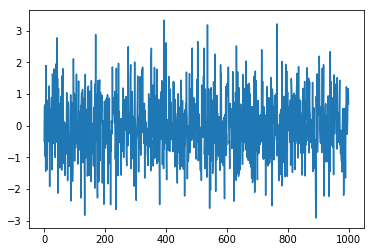

In [89]:
# 创建一个Series

# 随机生成1000个数据
data = pd.Series(np.random.randn(1000),index=np.arange(1000))
 
# 为了方便观看效果, 我们累加这个数据
data.cumsum()

# pandas 数据可以直接观看其可视化形式
data.plot()

plt.show()

            A         B         C         D
0    2.383193  0.142720 -0.700993 -0.467893
1    1.655033  0.408014 -0.616147 -1.216909
2    0.671419  0.141170  1.067097  0.414341
3   -0.074627  0.988766 -2.309050 -1.097494
4    0.740542 -0.271498 -1.083106  1.369401
5    0.729683  2.135608  0.251553 -0.193377
6    0.543716 -0.984654  0.924003  0.807886
7    0.536201 -2.487345  0.361541 -0.412820
8    0.028487 -0.994186 -1.115904 -0.161973
9    2.160798  1.034898 -0.389657 -0.910493
10   0.114471  0.375304  0.518275 -0.657351
11   1.844034 -1.212533  0.450042  1.375233
12  -0.960440 -1.214450 -0.560966  0.114913
13   0.773742 -0.325594  0.937906 -0.646775
14  -0.045193 -1.078102  0.308054 -2.303213
15  -1.806344 -1.137825  1.782189  0.993348
16   0.454428  0.565336 -1.666768  0.796134
17   0.192132  0.820865  0.478139 -0.985416
18  -0.450853  0.352590 -0.857604  0.361895
19   1.639347 -0.450483  1.084081 -0.557429
20   1.380439  0.292943  0.453512 -0.259712
21   1.894861 -0.379559 -0.74964

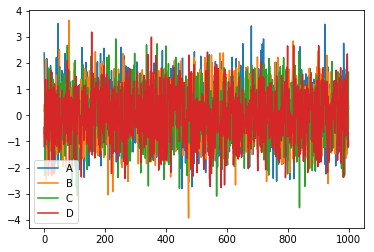

In [90]:
# DataFrame 可视化

data = pd.DataFrame(
    np.random.randn(1000,4),
    index=np.arange(1000),
    columns=list("ABCD")
    )
data.cumsum()
print(data)
data.plot()
plt.show()

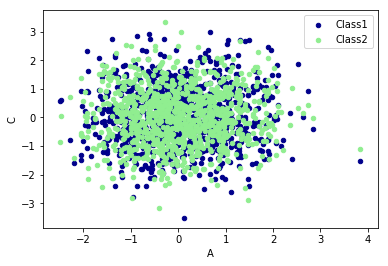

In [88]:
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')

# 将之下这个 data 画在上一个 ax 上面
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
plt.show()

In [92]:
import time
a = np.zeros((200, 200), order='C')
b = np.zeros((200, 200), order='F')
N = 9999

def f1(a):
    for _ in range(N):
        np.concatenate((a, a), axis=0)

def f2(b):
    for _ in range(N):
        np.concatenate((b, b), axis=0)

t0 = time.time()
f1(a)
t1 = time.time()
f2(b)
t2 = time.time()

print((t1-t0)/N)     # 0.000040
print((t2-t1)/N)     # 0.000070

2.3124241592860457e-05
3.020893825222366e-05


a = np.arange(1, 7).reshape((3,2))
a_view = a[:2]
a_copy = a[:2].copy()

简单说, a_view 的东西全部都是 a 的东西, 动 a_view 的任何地方, a 都会被动到, 因为他们在内存中的位置是一模一样的, 本质上就是自己. 而 a_copy 则是将 a copy 了一份, 然后把 a_copy 放在内存中的另外的地方, 这样改变 a_copy, a 是不会被改变的.

偶尔有时候要把一个矩阵展平, 用到 np.flatten() 或者 np.ravel(). 他俩是不同的! ravel 返回的是一个 view。

选择数据：
view的方式：
a_view1 = a[1:2, 3:6]    # 切片 slice
a_view2 = a[:100]        # 同上
a_view3 = a[::2]         # 跳步
a_view4 = a.ravel()      # 上面提到了


copy的方式：
a_copy1 = a[[1,4,6], [2,4,6]]   # 用 index 选
a_copy2 = a[[True, True], [False, True]]  # 用 mask
a_copy3 = a[[1,2], :]        # 虽然 1,2 的确连在一起了, 但是他们确实是 copy
a_copy4 = a[a[1,:] != 0, :]  # fancy indexing
a_copy5 = a[np.isnan(a), :]  # fancy indexing


加速
1.使用 np.take(), 替代用 index 选数据的方法.
使用 np.compress(), 替代用 mask 选数据的方法.

out参数
a = a + 1         # 0.035230
a = np.add(a, 1)     # 0.032738
这两个被赋值的 a, 都是原来 a 的一个 copy, 并不是 a 的 view. 但是在功能里面有一个 out 参数, 让我们不必要重新创建一个 a. 所以下面两个是一样的功能, 都不会创建另一个 copy. 不过可能是上面提到的那个原因, 这里的运算时间也有差.
a += 1                 # 0.011219
np.add(a, 1, out=a)    # 0.008843